<h1>
<font color="#ff2e2e">
Corner Detection
</font>
</h1>

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [33]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Complete the harris_points function without using OpenCV functions </font></h3>

In [34]:

SOBEL_X = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int32")

SOBEL_Y = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int32")              

def harris_points(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''    
    img1_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

    Ix = cv2.filter2D(img1_gray,cv2.CV_64F ,  SOBEL_X) 
    Iy = cv2.filter2D(img1_gray,cv2.CV_64F,  SOBEL_Y) 
    Ix2 = np.square(Ix)
    Iy2 = np.square(Iy)
    IxIy = Ix*Iy 
    
   
    I_dx2  = cv2.GaussianBlur(Ix2,(3,3),0)
    I_dy2 = cv2.GaussianBlur(Iy2,(3,3),0)
    I_dxdy = cv2.GaussianBlur(IxIy,(3,3),0)
    harris = I_dx2*I_dy2 - np.square(I_dxdy) - 0.06*np.square(I_dx2 + I_dy2) 
    cv2.normalize(harris, harris, 0, 1, cv2.NORM_MINMAX)


    points = np.where(harris >= 0.3)
    arr = zip(*points[::-1])
    for pt in arr:
        cv2.circle(image, pt, 3, (0, 0, 255), -1)

    return image

<h3><font color = "#079e05"> Show the result </font></h3>

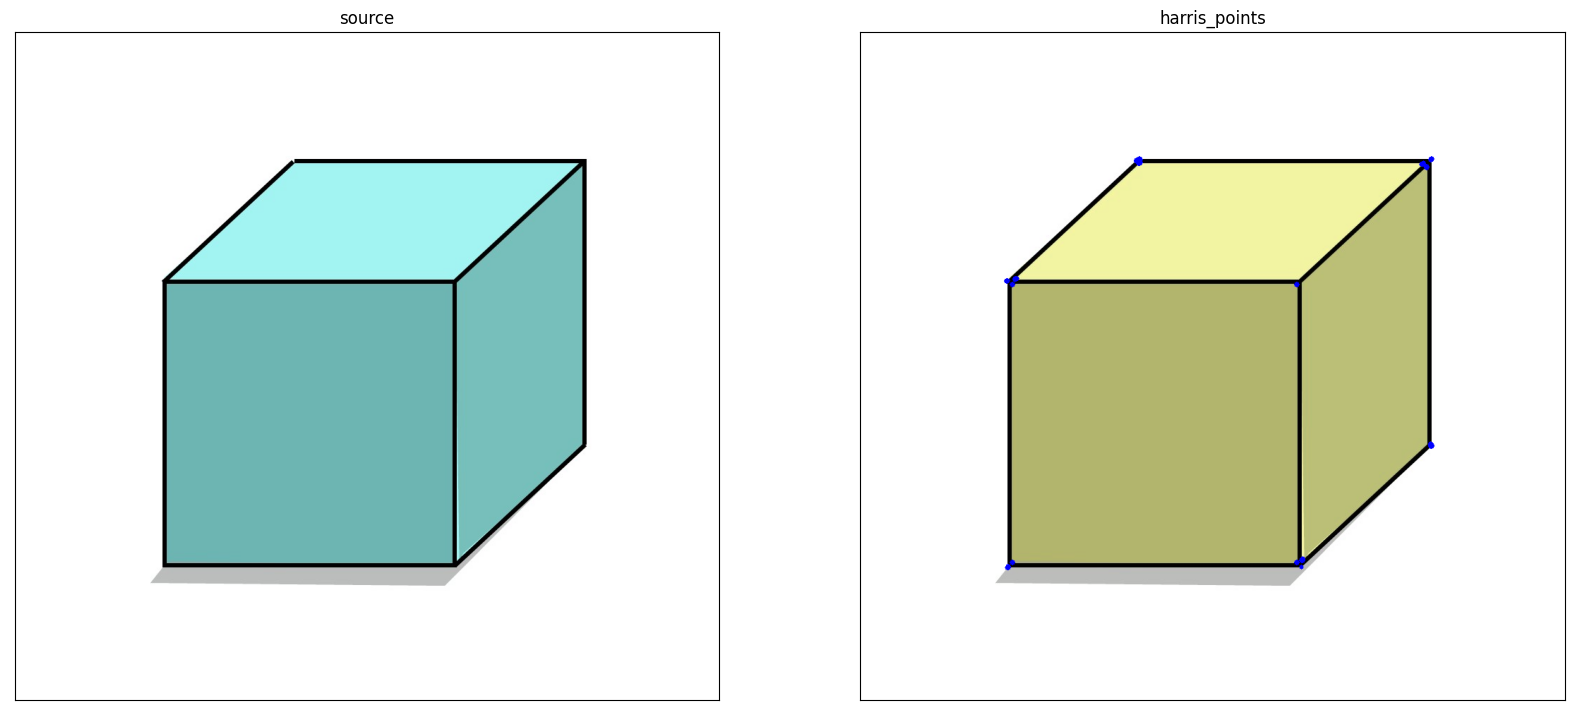

In [35]:
image_list = []
image = cv2.imread(os.path.join('images/Q5', 'harris.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([harris_points(image ), 'harris_points', 'img'])
plotter(image_list,1 , 2, True, 20, 10, '7')

<h3><font color = "#079e05"> Complete the harris_points_OpenCV function with using OpenCV functions </font></h3>

In [36]:
def harris_points_OpenCV(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''  
   
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    harris = cv2.cornerHarris(gray,3,3,0.06) 
    harris = cv2.dilate(harris,None)
  
   
    
    return harris

<h3><font color = "#079e05"> Show the result </font></h3>

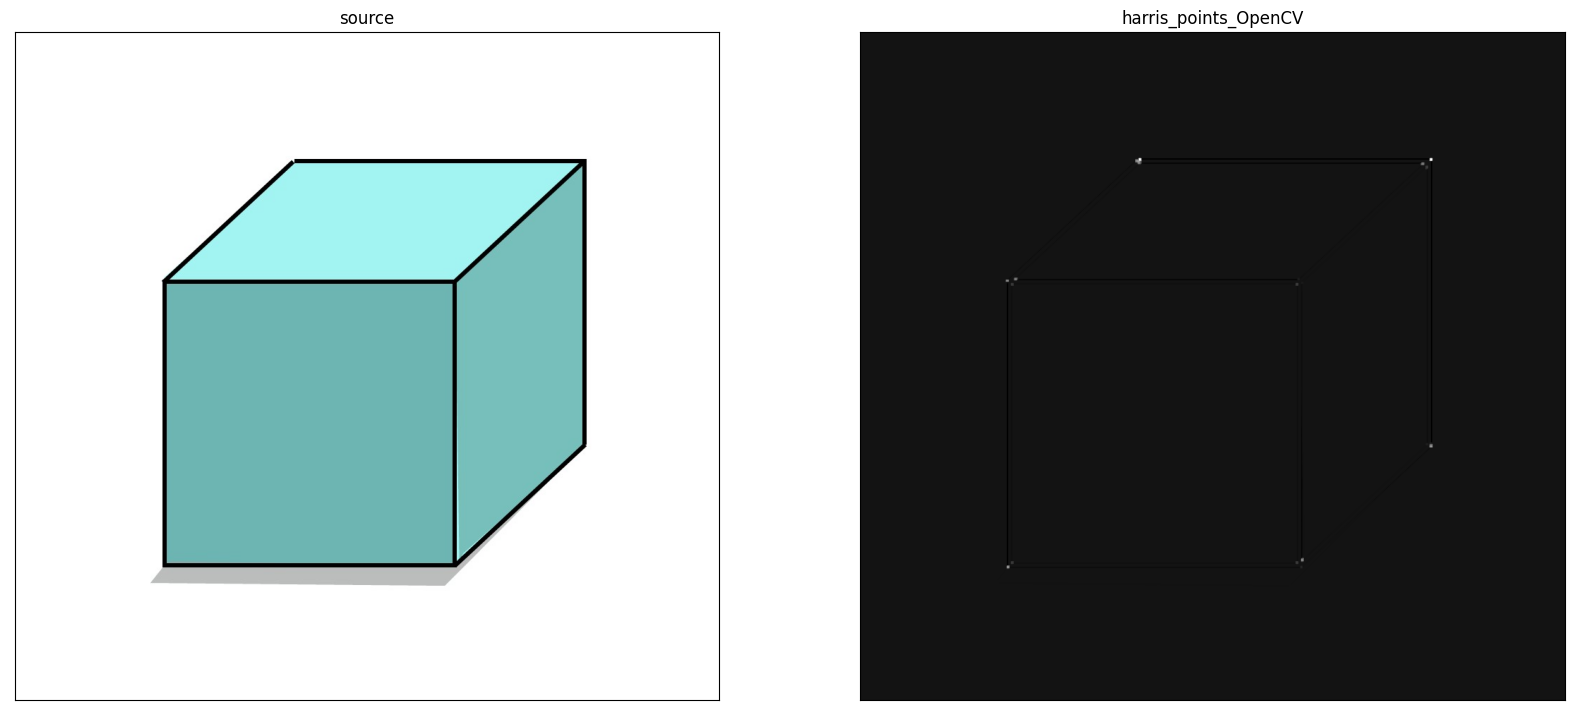

In [37]:
image_list = []
image = cv2.imread(os.path.join('images/Q5', 'harris.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([harris_points_OpenCV(image), 'harris_points_OpenCV', 'img'])
plotter(image_list,1 , 2, True, 20, 10, '7')